# Merge DataFrames

## Load datasets

In [1]:
import pandas as pd

path = '../../../data/topics/energy/generation/spain/full/wide_ts.csv'
df_generation = pd.read_csv(path)

path = '../../../data/topics/energy/price/spain/spot_merge.csv'
df_price = pd.read_csv(path)

## Merge DataFrames

,datetime,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
0,2022-06-01 00:00:00,2653.850,-175.0,-32.00,-300.0,1150.000,-994.300,583.200,293.600,2710.400,3488.900,1144.375,-40.8,0.000,630.025,0.100,8649.100,281.900,5211.0,217.09375
1,2022-06-01 01:00:00,1881.375,25.0,-30.00,0.0,1150.000,-1240.000,581.600,295.000,2651.000,3457.925,1078.675,-40.8,0.000,627.500,0.100,8204.150,124.025,5240.0,204.79750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114,2022-12-30 23:00:00,3527.675,-400.0,-51.00,-550.0,-1073.900,2097.100,258.000,264.800,841.300,11474.700,260.000,-153.0,-2085.000,0.000,1.400,1640.000,420.075,6764.0,22.80500
5115,2022-12-31 00:00:00,919.425,0.0,-11.75,-125.0,173.325,713.925,66.075,65.525,212.425,2195.925,65.000,-25.5,-857.175,0.000,0.075,512.683,0.000,1680.2,25.82875


## Multivariate analysis

For example, a correlation heatmap with seaborn.

,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
datetime,,,,,,,,,,,,,,,,,,,
2022-06-01 00:00:00,2653.850,-175.0,-32.00,-300.0,1150.000,-994.300,583.200,293.600,2710.400,3488.900,1144.375,-40.8,0.000,630.025,0.100,8649.100,281.900,5211.0,217.09375
2022-06-01 01:00:00,1881.375,25.0,-30.00,0.0,1150.000,-1240.000,581.600,295.000,2651.000,3457.925,1078.675,-40.8,0.000,627.500,0.100,8204.150,124.025,5240.0,204.79750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 23:00:00,3527.675,-400.0,-51.00,-550.0,-1073.900,2097.100,258.000,264.800,841.300,11474.700,260.000,-153.0,-2085.000,0.000,1.400,1640.000,420.075,6764.0,22.80500
2022-12-31 00:00:00,919.425,0.0,-11.75,-125.0,173.325,713.925,66.075,65.525,212.425,2195.925,65.000,-25.5,-857.175,0.000,0.075,512.683,0.000,1680.2,25.82875


,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
Hidráulica,100.000000,96.295706,-96.715749,-0.125120,97.852284,-97.372307,98.034308,97.969434,98.119835,98.016468,-1.229759,-96.362723,-97.562248,-7.419561,-6.911661,96.753675,7.323945,98.176186,-0.659570
Ajuste P48,96.295706,100.000000,-94.861987,3.452885,98.360243,-98.337879,98.465198,98.451853,98.355424,98.281748,-5.400940,-96.073074,-98.570097,-3.666302,-3.978077,97.254114,-5.282027,98.466914,-3.724692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nuclear,98.176186,98.466914,-96.830394,1.943144,99.791027,-99.835264,99.972176,99.970436,99.849898,99.799828,-3.207557,-97.897252,-99.770289,-1.255067,-1.296341,99.025463,-1.552967,100.000000,-1.624279
price,-0.659570,-3.724692,0.524520,-11.316183,-4.054147,2.505427,-2.233918,-2.341595,-3.987057,-3.747205,53.182666,1.724882,4.568784,22.364592,1.828991,4.566996,13.295309,-1.624279,100.000000


<Axes: >

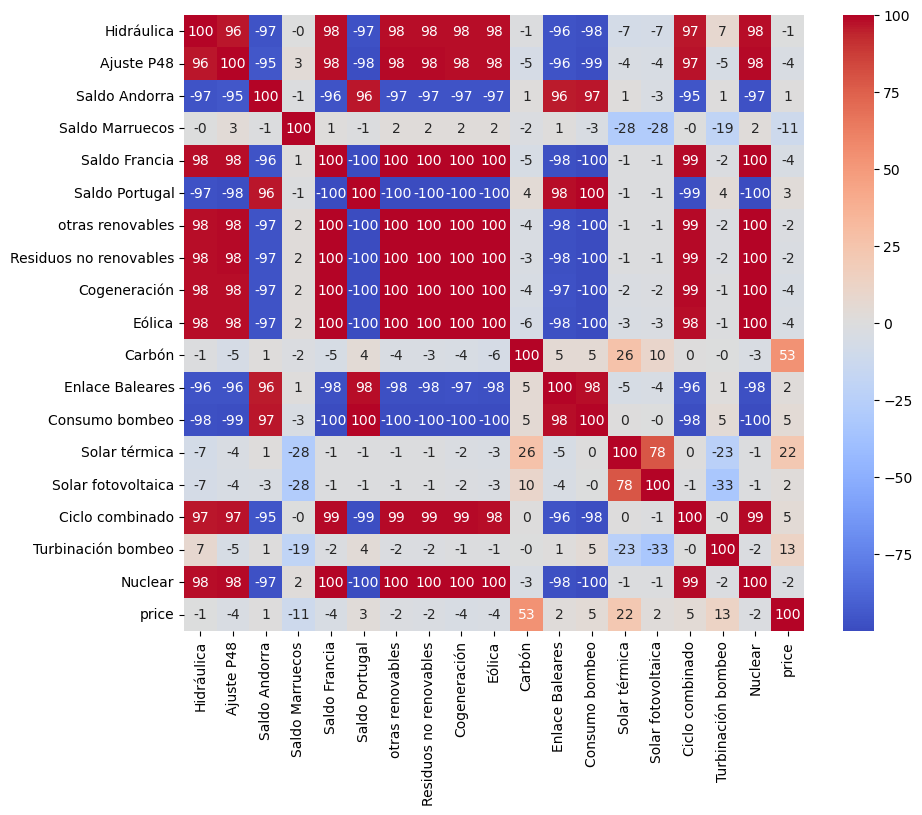

,Saldo Marruecos,Turbinación bombeo,Carbón
Saldo Marruecos,1.000000,-0.194812,-0.020489
Turbinación bombeo,-0.194812,1.000000,-0.004219
Carbón,-0.020489,-0.004219,1.000000


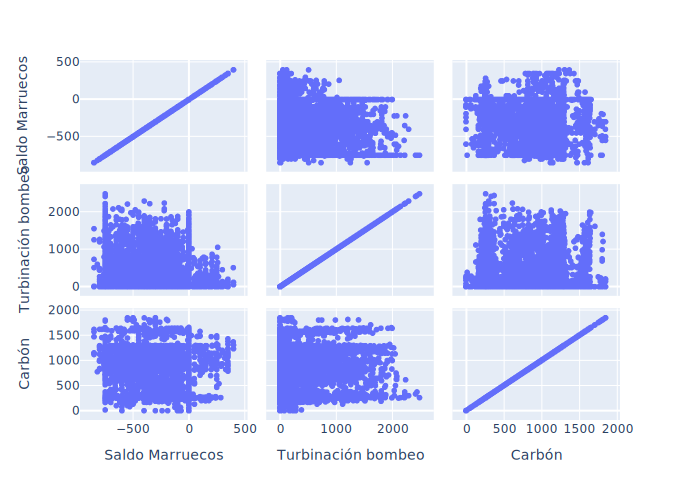

## Merge types

![](src/Miro%20Medium%20Image.png)

### Left

,datetime,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
0,2022-01-01 00:00:00,2171.600,0.0,-44.00,33.0,3330.000,-761.100,584.100,312.500,1742.800,6380.800,810.0,-40.8,-1243.000,10.0,7.100,1885.400,50.000,6096.7,NaN
1,2022-01-01 01:00:00,2075.100,100.0,-42.00,133.0,3330.000,-1673.800,572.900,313.900,1729.100,6563.300,815.0,-40.8,-1688.000,10.0,19.100,1948.800,0.000,6098.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8737,2022-12-30 23:00:00,3527.675,-400.0,-51.00,-550.0,-1073.900,2097.100,258.000,264.800,841.300,11474.700,260.0,-153.0,-2085.000,0.0,1.400,1640.000,420.075,6764.0,22.80500
8738,2022-12-31 00:00:00,919.425,0.0,-11.75,-125.0,173.325,713.925,66.075,65.525,212.425,2195.925,65.0,-25.5,-857.175,0.0,0.075,512.683,0.000,1680.2,25.82875


### Right

,datetime,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
0,2022-06-01 00:00:00,2653.850,-175.0,-32.0,-300.0,1150.0,-994.3,583.2,293.6,2710.4,3488.900,1144.375,-40.8,0.0,630.025,0.1,8649.10,281.900,5211.0,217.09375
1,2022-06-01 01:00:00,1881.375,25.0,-30.0,0.0,1150.0,-1240.0,581.6,295.0,2651.0,3457.925,1078.675,-40.8,0.0,627.500,0.1,8204.15,124.025,5240.0,204.79750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9480,2023-06-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.05125
9481,2023-06-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.47750


### Outer

,datetime,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
0,2022-01-01 00:00:00,2171.6,0.0,-44.0,33.0,3330.0,-761.1,584.1,312.5,1742.8,6380.8,810.0,-40.8,-1243.0,10.0,7.1,1885.4,50.0,6096.7,NaN
1,2022-01-01 01:00:00,2075.1,100.0,-42.0,133.0,3330.0,-1673.8,572.9,313.9,1729.1,6563.3,815.0,-40.8,-1688.0,10.0,19.1,1948.8,0.0,6098.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13103,2023-06-30 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.05125
13104,2023-06-30 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.47750


### Inner

,datetime,Hidráulica,Ajuste P48,Saldo Andorra,Saldo Marruecos,Saldo Francia,Saldo Portugal,otras renovables,Residuos no renovables,Cogeneración,Eólica,Carbón,Enlace Baleares,Consumo bombeo,Solar térmica,Solar fotovoltaica,Ciclo combinado,Turbinación bombeo,Nuclear,price
0,2022-06-01 00:00:00,2653.850,-175.0,-32.00,-300.0,1150.000,-994.300,583.200,293.600,2710.400,3488.900,1144.375,-40.8,0.000,630.025,0.100,8649.100,281.900,5211.0,217.09375
1,2022-06-01 01:00:00,1881.375,25.0,-30.00,0.0,1150.000,-1240.000,581.600,295.000,2651.000,3457.925,1078.675,-40.8,0.000,627.500,0.100,8204.150,124.025,5240.0,204.79750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114,2022-12-30 23:00:00,3527.675,-400.0,-51.00,-550.0,-1073.900,2097.100,258.000,264.800,841.300,11474.700,260.000,-153.0,-2085.000,0.000,1.400,1640.000,420.075,6764.0,22.80500
5115,2022-12-31 00:00:00,919.425,0.0,-11.75,-125.0,173.325,713.925,66.075,65.525,212.425,2195.925,65.000,-25.5,-857.175,0.000,0.075,512.683,0.000,1680.2,25.82875
